# Introducción al aprendizaje automatizado - TP 0
## Autora: Aldana Zarate

Como los apartados a) y b) son idénticos solo que difieren en el centro de las distribuciones y sus desviaciones estándar, primero crearemos una función auxiliar que además de los parámetros pedidos tome adicionalmente los mencionados para luego usarla adecuadamente.


In [1]:
import pandas as pd
import numpy as np
import math

def generate_dataframe(center1, center2, std_dev, d, n):
    cov_matrix = np.diag([std_dev ** 2] * d)
    ndarray1 = np.random.multivariate_normal(center1, cov_matrix, size = n // 2)
    ndarray2 = np.random.multivariate_normal(center2, cov_matrix, size = math.ceil(n / 2))
    
    ndarray = np.concatenate((ndarray1, ndarray2))
    
    dataframe = pd.DataFrame(data = ndarray)
    
    dataframe['Clase'] = np.append([1] * (n // 2), [0] * (math.ceil(n / 2)))
    return dataframe
    

### Apartado a)

In [2]:
def generate_dataframe_ej_a(d, n, c):
    return generate_dataframe([1] * d, [-1] * d, c * math.sqrt(d), d, n)


### Apartado b)

In [3]:
def generate_dataframe_ej_b(d, n, c):
    return generate_dataframe(np.append([1],[0] * (d-1)), np.append([-1], [0] * (d-1)), c, d, n)
    

### Verificación de los problemas a) y b)
Pasamos a generar dos dataframes de ejemplo y los graficamos para visualizar los datos resultantes.

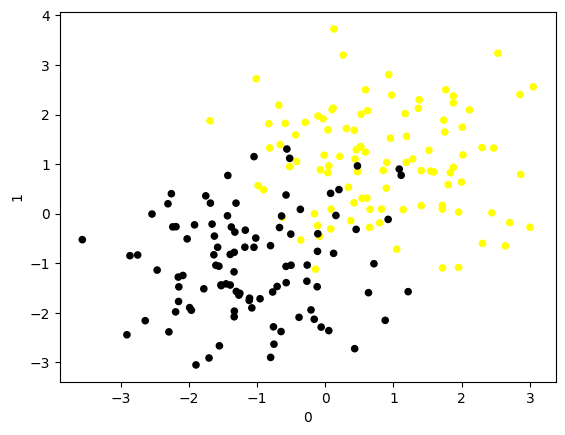

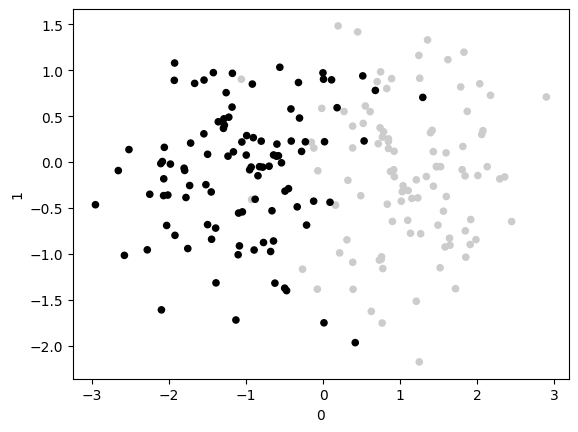

In [4]:
import matplotlib.pyplot as plt

df_a = generate_dataframe_ej_a(2, 200, 0.75)
df_b = generate_dataframe_ej_b(2, 200, 0.75)

df_a.plot(x=0, y=1, kind='scatter', c='Clase', colormap='gnuplot',colorbar=False)
df_b.plot(x=0, y=1, kind='scatter', c='Clase', colormap='nipy_spectral',colorbar=False)
plt.show()

Pasamos ahora a trabajar con un input de ejemplo más, y vamos a calcularle su media y desviación estándar resultante para comparar con la original y ver qué tan cerca estuvo.

In [5]:
dataframe_a = generate_dataframe_ej_a(4, 5000, 2.00)
dataframe_b = generate_dataframe_ej_b(4, 5000, 2.00)

print("Media para el dataframe del a)")
df_ag = dataframe_a.groupby('Clase')
print(df_ag.mean())
print("\nDesviación estandar para el dataframe del a)")
print(df_ag.std())

df_bg = dataframe_b.groupby('Clase')
print("\nMedia para el dataframe del b)")
print(df_bg.mean())
print("\nDesviación estandar para el dataframe del b)")
print(df_bg.std())

Media para el dataframe del a)
              0         1         2         3
Clase                                        
0     -0.958565 -1.019655 -1.096813 -0.930128
1      0.811205  1.084939  1.189489  0.951648

Desviación estandar para el dataframe del a)
              0         1         2         3
Clase                                        
0      4.006353  4.041707  3.896579  4.050258
1      4.033212  4.074553  4.027884  3.988437

Media para el dataframe del b)
              0         1         2         3
Clase                                        
0     -0.954426 -0.062645 -0.016055  0.008949
1      0.949524  0.054002 -0.082508 -0.000843

Desviación estandar para el dataframe del b)
              0         1         2         3
Clase                                        
0      2.019354  2.014369  1.987536  1.951169
1      2.025724  2.035446  2.024519  1.986550


Se observa un margen de error alrededor del 5\% en la mayoría de los casos, con lo cual considero que la generación de datos fue adecuada. 

### Apartado C

<AxesSubplot:xlabel='x', ylabel='y'>

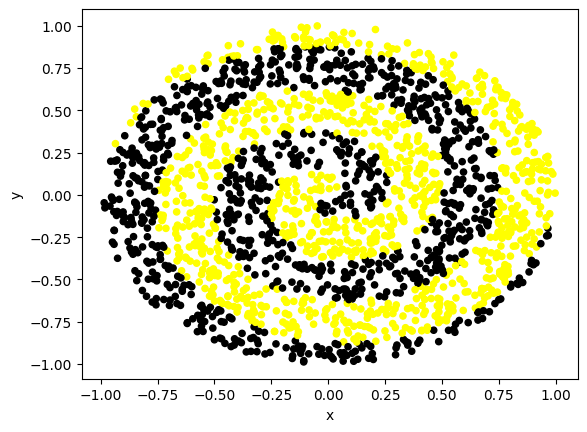

In [6]:
import random
    
def generate_random_spirals(n):    
    coords_x = []
    coords_y = []
    clase = []
    
    total_cant_0 = n // 2
    total_cant_1 = n - total_cant_0
    
    cant_0 = 0
    cant_1 = 0
    
    while (cant_0 < total_cant_0 or cant_1 < total_cant_1):
        betweenCurves = False
        # random() generates a random float uniformly in the half-open range 0.0 <= X < 1.0 (doc. de Python)
        # Como el area es proporcional al cuadrado del radio, genero uniformemente areas aleatorias y tomo sus 
        # raices cuadradas
        r = math.sqrt(random.random())
        # Genero angulo
        theta = 2 * math.pi * random.random()
        # Intentando graficar las curvas en desmos (una graficadora) para entender
        # porque los thetas anteriores me cortaban la espiral, me di cuenta que tomando el rango de valores
        # de theta anteriores no me alcanza para generar sobre toda la espiral, asi que agregué
        # este for para ir recorriendo la espiral con diferentes thetas (basados en el generado de manera uniforme)
        # e ir limitando por el radio
        for theta0 in [theta + (2 * math.pi * i) for i in range(-1, 5)]:
            if ((theta0 / (4 * math.pi)) < r and r < ((theta0+ math.pi) / (4 * math.pi))):
                coords_x.append(r * math.cos(theta))
                coords_y.append(r * math.sin(theta))
                clase.append(0)
                cant_0+=1
                betweenCurves = True
        # Si no está entre las curvas, lo mando a la clase 1
        if cant_1 < total_cant_1 and not(betweenCurves):
            coords_x.append(r * math.cos(theta))
            coords_y.append(r * math.sin(theta))
            clase.append(1)
            cant_1+=1
            
    spirals = {'x': coords_x, 'y': coords_y, 'Clase' : clase}
    dataframe = pd.DataFrame(spirals)
    return dataframe

random.seed()
df = generate_random_spirals(2000)
df.plot(x=0, y=1, kind='scatter', c='Clase', colormap='gnuplot',colorbar=False)